# Homework 1 - Nasir Khalid - 65082
-------------------------------------------------------

### Theoretical Section 
-------------------------------------------------------
#### Q1:  For a 3 dimensional dataset, What is the minimum number of points that are required to fit a hyperplane?

For a 3 dimensional dataset we would have: 

$$y = w_0 + [w_1 w_2 w_3] * [x_1 x_2 x_3]^T$$

Therefore the hyperplane is a 2D plane which requires a minimum of 3 points. 

#### Q2: Write a summary on "Deep Learning"

The paper begins by explaining how recent advances in deep learning have allowed machines to teach them selves to identify patterns in high dimensional data. It then discusses supervised learning and explains how a basic neural net works using an error function and then trying to minimize output by using the stochastic gradient descent. The paper explains how this technique only works on shallow data and feature extractors are needed to make it applicable to more complex data as well as invariant to . Before discussing the use of these feature extractors the paper first explains the principle of backpropogation and also discusses briefly that the issue of wrong minima in gradient descent is not a major one. After this it discusses the convolutional neural networks and how they are used to process data that is in the form of multiple arrays. They use pooling and convolution along with certain filter banks, the success of these feedforward networks have made them the standard for image related learning. A network that uses CNN + RNN is discussed which is able to identify objects and features of images using the CNN and after this the RNN creates a caption for the image. The paper then discusses how hidden layers of the network learn to represent the data as a sequential decomposition in to simpler forms, due to these distributed representations the networks are great at prediction and one such example discussed is how computers can predict what a person will type next. The second last section is about the Recurrent neural networks and how they are great for predictive behaviour and their main objective is to learn about long-term dependencies. The final section discusses the future of deep learning and how the authours believe that the way forward for innovation is in unsupervised learning.


#### Q3: What is the difference between deep and shallow learning. Explain with concrete example(s) when shallow learning is suitable as compared to deep learning and vise versa. 

Shallow learning cases are those where data can be easily segregated in to different classes and the entire network is made up of a single hidden layer containing few neurons. In these cases the dataset provided is already labelled and the computer simply learns how to fit the data with it's labels. Often this is just a binary classification problem.

In deep learning however we provide the network with some data and expect it to identify the patterns and classify the output on its own. This sort of learning often consists of a huge number of hidden layers each consisting of a large number of neurons.

Examples of shallow learning often include linear regression or binary classification problems where the data can be easily split without the need of higher level transformations. One example is guessing the price of a house based on it's square feet. Here we would use previous data of area vs price and linear regression to get a price for given area. It is useful when space can be carved in to half-spaces separated by a hyperplane.

Examples of deep learning are in cases where we have just input data and are looking for our network to learn and find patterns. One example is face recognition or even identifying different breeds of dogs because in both these cases a much higher order transformation is needed to sufficiently identify patterns.

### Implementation Section 
-------------------------------------------------------
Here we take the error function to be the mean squared error give as:

$$Error = \frac{1}{N} * \sum_{n \in data} (t_n - y_n)^2 $$

The derivative of this function with respect to the weights is given by:

$$\Delta w = \frac{1}{N} * \sum_{n \in data} \epsilon * x_n * (t_n - y_n) $$

In this case we have only one weight since we are using a linear neuron so it becomes:

$$\Delta w = \epsilon * x_n * (t_n - y_n) $$

We also have one bias and the input for it is one so $ x_n = 1 $ therefore it simplifies to:

$$\Delta b = \epsilon * 1 * (t_n - y_n) $$

In [89]:
# Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# Importing all required datasets
(x_train_1, y_train_1), (x_test_1, y_test_1) = pkl.load( open( "dataset.pkl", "rb" ) )
(x_train_2, y_train_2), (x_test_2, y_test_2)= pkl.load( open( "dataset2.pkl", "rb" ) )

# Making sure all loaded data is a 1D Tensor
x_train_1 = x_train_1.flatten()
y_train_1 = y_train_1.flatten()
x_test_1 = x_test_1.flatten()
y_test_1 = y_test_1.flatten()
x_train_2 = x_train_2.flatten()
y_train_2 = y_train_2.flatten()
x_test_2 = x_test_2.flatten()
y_test_2 = y_test_2.flatten()


# Defining a neuron class
class neuron:
    def __init__(self, weight, bias):
        self.weight = weight
        self.bias = bias
    
    def fire(self, x):
        self.output = (self.weight * x) + self.bias
        return self.output
    
    def error(self, y_actual):
        self.err = self.output - y_actual
        return self.err
    
    def mse(self, y_actual):
        return (1/len(y_actual) * ((y_actual - self.output)*(y_actual - self.output)).sum())
        
    def grad_des(self, x, rate):
        for i, val in enumerate(x):
            self.weight -= val * self.err[i] * rate
            self.bias -= self.err[i] * rate
        
    def plot(self, x, y, title):
        plt.plot(x, y, 'ro', x, self.output)
        plt.title(title)
        plt.show(block=False)
        

# Creating a neuron for the first dataset with initialized weight = bias = 1
N1 = neuron(1, 1)

# Creating a neuron for the second dataset with initialized weight = bias = 1
N2 = neuron(1, 1)

# Learning rate for the first neuron (dataset_1)
lr_1 = 0.00001

# Learning rate for the first neuron (dataset_2)
lr_2 = 0.001

# Learning rates were decided after a lot of trial and error. Dataset 1 tends
# to oscillate and eventually 'explode' for a larger learning rate than the one used.

Training N1 for Dataset 1
--------------------------------------------


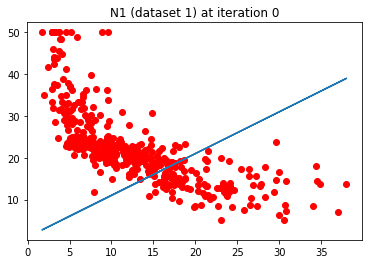

Error on iteration 0 = -3496.3099999999995
MSE Error on iteration 0 = 309.43399628712876
Weight on iteration 0 = 1.0365818649999985
Bias on iteration 0 = 1.034963099999999



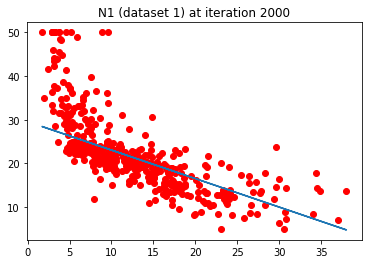

Error on iteration 2000 = -456.3319600354945
MSE Error on iteration 2000 = 44.68678282840193
Weight on iteration 2000 = -0.6526875383272002
Bias on iteration 2000 = 29.582398570769193



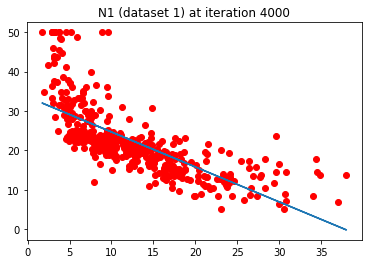

Error on iteration 4000 = -63.7286417233271
MSE Error on iteration 4000 = 39.531599250676464
Weight on iteration 4000 = -0.8893980703034019
Bias on iteration 4000 = 33.56911843657734



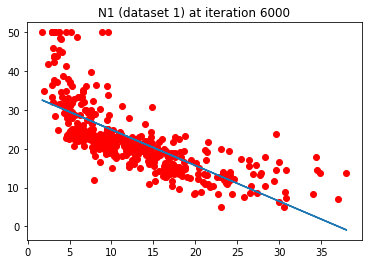

Error on iteration 6000 = -8.899967855930633
MSE Error on iteration 6000 = 39.43105628601307
Weight on iteration 6000 = -0.9224556731135382
Bias on iteration 6000 = 34.12588032097215



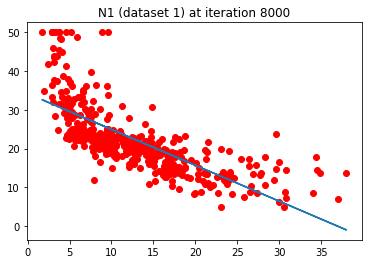

Error on iteration 8000 = -1.2429172454847617
MSE Error on iteration 8000 = 39.42909536889127
Weight on iteration 8000 = -0.9270723037909491
Bias on iteration 8000 = 34.20363441615787



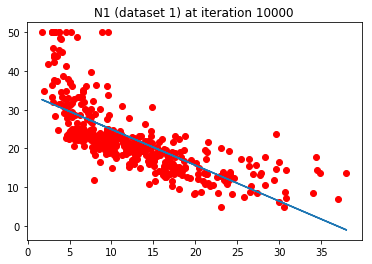

Error on iteration 10000 = -0.17357852353055137
MSE Error on iteration 10000 = 39.42905712458476
Weight on iteration 10000 = -0.9277170353200178
Bias on iteration 10000 = 34.2144930964776



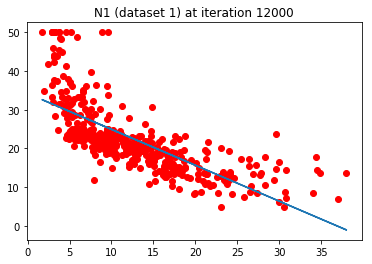

Error on iteration 12000 = -0.02424095739954879
MSE Error on iteration 12000 = 39.42905637869551
Weight on iteration 12000 = -0.9278070747391357
Bias on iteration 12000 = 34.216009556002646



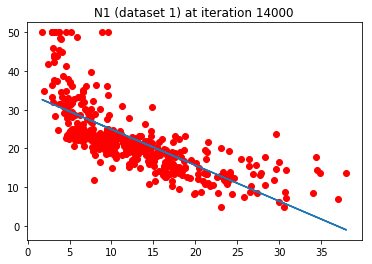

Error on iteration 14000 = -0.0033853499558489375
MSE Error on iteration 14000 = 39.429056364148224
Weight on iteration 14000 = -0.9278196491156276
Bias on iteration 14000 = 34.216221335834035



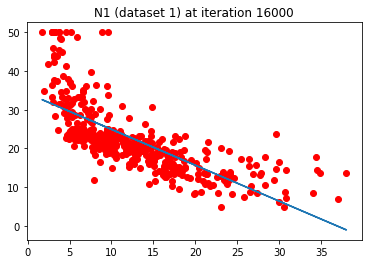

Error on iteration 16000 = -0.00047277794910627335
MSE Error on iteration 16000 = 39.429056363864504
Weight on iteration 16000 = -0.9278214051793934
Bias on iteration 16000 = 34.21625091176491



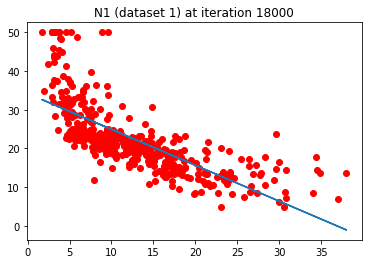

Error on iteration 18000 = -6.602546695688716e-05
MSE Error on iteration 18000 = 39.42905636385897
Weight on iteration 18000 = -0.9278216504208123
Bias on iteration 18000 = 34.21625504216345



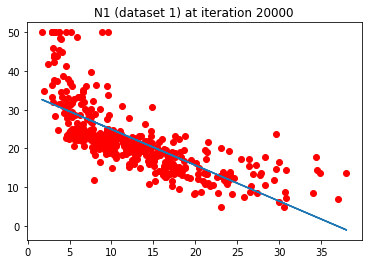

Error on iteration 20000 = -9.220773385720804e-06
MSE Error on iteration 20000 = 39.42905636385886
Weight on iteration 20000 = -0.9278216846698336
Bias on iteration 20000 = 34.21625561899132

--------------------------------------------


In [90]:
# Here we train N1 for dataset 1

loops = 20000
print("Training N1 for Dataset 1")
print("--------------------------------------------")
for z in range(0, loops + 1):
    # Activate the first neuron and get an output
    N1.fire(x_train_1)
    
    # Get the first error based on the previous output
    error_N1 = N1.error(y_train_1)

    # Perform gradient descent using input with learning rate of lr_1
    N1.grad_des(x_train_1, lr_1)

    if (z%(loops/10)) == 0:
        N1.plot(x_train_1, y_train_1, 'N1 (dataset 1) at iteration ' + str(z))
        print("Error on iteration " + str(z) + " = " + str(error_N1.sum()))
        print("MSE Error on iteration " + str(z) + " = " + str(N1.mse(y_train_1)))
        print("Weight on iteration " + str(z) + " = " + str(N1.weight))
        print("Bias on iteration " + str(z) + " = " + str(N1.bias) + '\n')
        

print("--------------------------------------------")

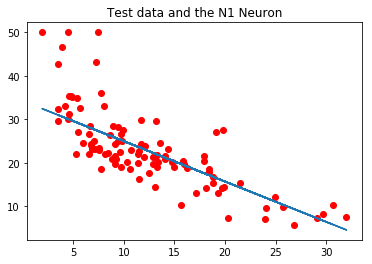

Final weight = -0.9278216846698336
Final bias = 34.21625561899132
The MSE error for test data = 34.876196812246626


In [91]:
# FOR N1: Here we get the final weight and bias. Then we test on the test data

# Fire neuron for test input
N1.fire(x_test_1)

# Getting the mean squared error 
error = N1.mse(y_test_1)

# Plot test data and the Neuron line
plt.plot(x_test_1, y_test_1, 'ro', x_test_1, N1.fire(x_test_1))
plt.title('Test data and the N1 Neuron')
plt.show(block=False)

print("Final weight = " + str(N1.weight))
print("Final bias = " + str(N1.bias))
print("The MSE error for test data = " + str(error))


Training N2 for Dataset 2
--------------------------------------------


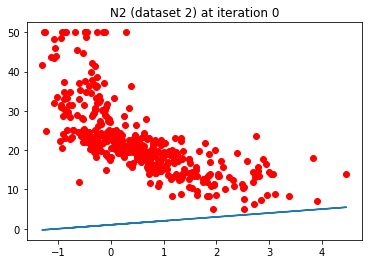

Error on iteration 0 = -8440.80684094769
MSE Error on iteration 0 = 535.612696187804
Weight on iteration 0 = 2.097271690364214
Bias on iteration 0 = 9.440806840947694



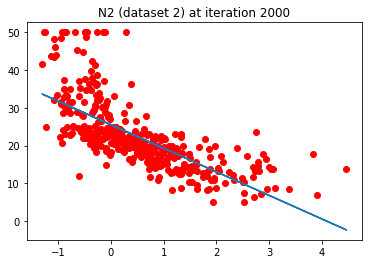

Error on iteration 2000 = -2.9181990157667315e-11
MSE Error on iteration 2000 = 42.840198079698794
Weight on iteration 2000 = -6.238131127132819
Bias on iteration 2000 = 25.526362172905422



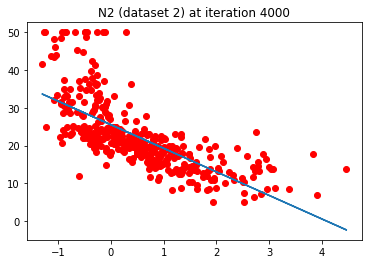

Error on iteration 4000 = -2.9181990157667315e-11
MSE Error on iteration 4000 = 42.840198079698794
Weight on iteration 4000 = -6.238131127132819
Bias on iteration 4000 = 25.526362172905422



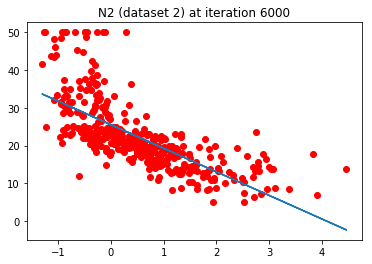

Error on iteration 6000 = -2.9181990157667315e-11
MSE Error on iteration 6000 = 42.840198079698794
Weight on iteration 6000 = -6.238131127132819
Bias on iteration 6000 = 25.526362172905422



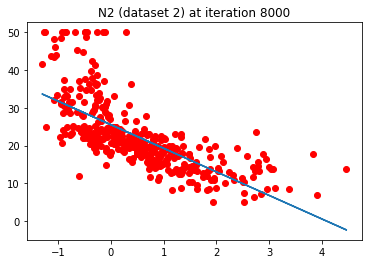

Error on iteration 8000 = -2.9181990157667315e-11
MSE Error on iteration 8000 = 42.840198079698794
Weight on iteration 8000 = -6.238131127132819
Bias on iteration 8000 = 25.526362172905422



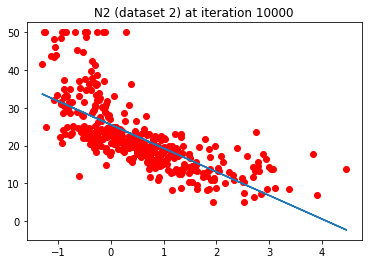

Error on iteration 10000 = -2.9181990157667315e-11
MSE Error on iteration 10000 = 42.840198079698794
Weight on iteration 10000 = -6.238131127132819
Bias on iteration 10000 = 25.526362172905422



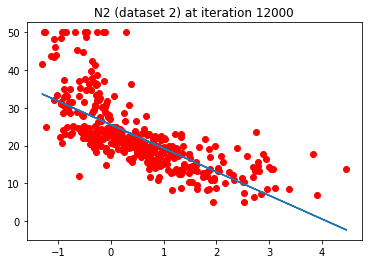

Error on iteration 12000 = -2.9181990157667315e-11
MSE Error on iteration 12000 = 42.840198079698794
Weight on iteration 12000 = -6.238131127132819
Bias on iteration 12000 = 25.526362172905422



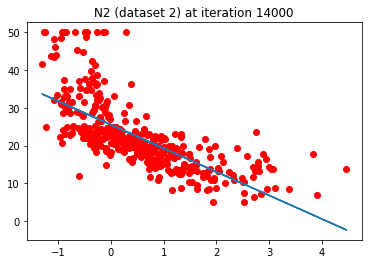

Error on iteration 14000 = -2.9181990157667315e-11
MSE Error on iteration 14000 = 42.840198079698794
Weight on iteration 14000 = -6.238131127132819
Bias on iteration 14000 = 25.526362172905422



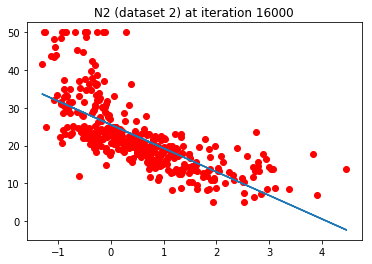

Error on iteration 16000 = -2.9181990157667315e-11
MSE Error on iteration 16000 = 42.840198079698794
Weight on iteration 16000 = -6.238131127132819
Bias on iteration 16000 = 25.526362172905422



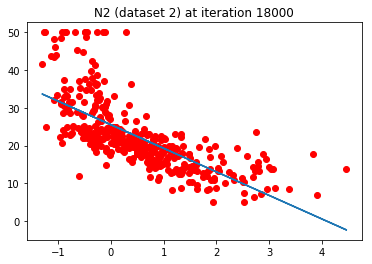

Error on iteration 18000 = -2.9181990157667315e-11
MSE Error on iteration 18000 = 42.840198079698794
Weight on iteration 18000 = -6.238131127132819
Bias on iteration 18000 = 25.526362172905422



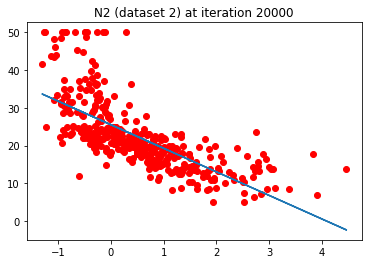

Error on iteration 20000 = -2.9181990157667315e-11
MSE Error on iteration 20000 = 42.840198079698794
Weight on iteration 20000 = -6.238131127132819
Bias on iteration 20000 = 25.526362172905422

--------------------------------------------


In [92]:
# Here we train N2 for dataset 2

loops = 20000
print("Training N2 for Dataset 2")
print("--------------------------------------------")
for z in range(0, loops + 1):
    # Activate the first neuron and get an output
    N2.fire(x_train_2)
    
    # Get the first error based on the previous output
    error_N2 = N2.error(y_train_2)

    # Perform gradient descent using input with learning rate of lr_2
    N2.grad_des(x_train_2, lr_2)

    if (z%(loops/10)) == 0:
        N2.plot(x_train_2, y_train_2, 'N2 (dataset 2) at iteration ' + str(z))
        print("Error on iteration " + str(z) + " = " + str(error_N2.sum()))
        print("MSE Error on iteration " + str(z) + " = " + str(N2.mse(y_train_1)))
        print("Weight on iteration " + str(z) + " = " + str(N2.weight))
        print("Bias on iteration " + str(z) + " = " + str(N2.bias) + '\n')
        

print("--------------------------------------------")

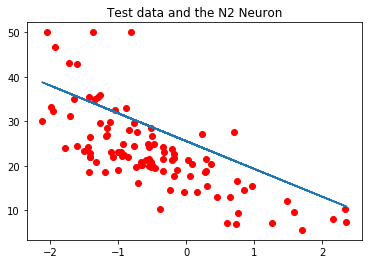

Final weight = -6.238131127132819
Final bias = 25.526362172905422
The MSE error for test data = 70.80834523792845


In [93]:
# FOR N2: Here we get the final weight and bias. Then we test on the test data

# Fire neuron for test input
N2.fire(x_test_2)

# Getting the mean squared error 
error = N2.mse(y_test_2)

# Plot test data and the Neuron line
plt.plot(x_test_2, y_test_2, 'ro', x_test_2, N2.fire(x_test_2))
plt.title('Test data and the N2 Neuron')
plt.show(block=False)

print("Final weight = " + str(N2.weight))
print("Final bias = " + str(N2.bias))
print("The MSE error for test data = " + str(error))


### For Dataset 1

$$\text{Weight} = -0.9278216846698336$$

$$\text{Bias} = 34.21625561899132$$

$$\text{MSE error on Training Dataset} = 39.42905636385886$$

$$\text{MSE error on Test Dataset} = 34.876196812246626$$

### For Dataset 2

$$\text{Weight} = -6.238131127132819$$

$$\text{Bias} = 25.526362172905422$$

$$\text{MSE error on Training Dataset} = 42.840198079698794$$

$$\text{MSE error on Test Dataset} = 70.80834523792845$$